In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # colour conversion
    image.flags.writeable = False                  # image is no longer writable
    results = model.process(image)                 # make prediction
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [4]:
def draw_landmarks(image, results):
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
#     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
#     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
#                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
#                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
#                              ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
#     # Draw left hand connections
#     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
#                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#                              ) 
#     # Draw right hand connections  
#     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
#                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
#                              )

In [6]:
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('Grass Hoppers Arm.mp4')
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print("results")
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results
results


In [7]:
# results.face_landmarks
# results.face_landmarks.landmark
# len(results.face_landmarks.landmark)

In [8]:
draw_landmarks(frame, results)

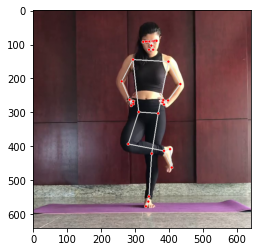

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
# print(results.left_hand_landmarks)

In [11]:
cap = cv2.VideoCapture('Grass Hoppers Arm.mp4')

In [12]:
len(results.left_hand_landmarks.landmark)

21

In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
if results.face_landmarks: 
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
else: face = np.zeros(1404)
print(face)

[ 0.54231638  0.18047027 -0.00352911 ...  0.56639463  0.14205387
 -0.00095096]


In [16]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [17]:
result_test = extract_keypoints(results)

In [18]:

result_test

array([ 0.54257149,  0.1630304 , -0.48519483, ...,  0.44331011,
        0.44218147, -0.0113353 ])

In [19]:
result_test.shape

(1662,)

In [20]:
np.save('0', result_test)

In [21]:
np.load('0.npy')

array([ 0.54257149,  0.1630304 , -0.48519483, ...,  0.44331011,
        0.44218147, -0.0113353 ])

In [22]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')     

# Actions that we try to detect
actions = np.array(['downdog'])

# Thirty videos worth of data
no_sequences = 15

# Videos are going to be 30 frames in length
sequence_length = 15

# Folder start
start_folder = 15

In [23]:
for action in actions: 
#     dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [24]:
# for action in actions: 
#     dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
#     for sequence in range(1,no_sequences+1):
#         try: 
#             os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
#         except:
#             pass

In [25]:
cap = cv2.VideoCapture('Grass Hoppers Arm.mp4')
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [26]:

cap.release()
cv2.destroyAllWindows()

In [27]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [28]:
label_map = {label:num for num, label in enumerate(actions)}


In [29]:
label_map


{'downdog': 0}

In [30]:
sequence_length = 15

sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [31]:
np.array(sequences).shape


(15, 15, 1662)

In [32]:
np.array(labels).shape


(15,)

In [33]:
X = np.array(sequences)


In [34]:
X.shape


(15, 15, 1662)

In [35]:
y = to_categorical(labels).astype(int)


In [36]:
y


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)


In [38]:
y_test.shape


(1, 1)

In [39]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [40]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [41]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [42]:
res = [.7, 0.2, 0.1]


In [43]:
actions[np.argmax(res)]


'downdog'

In [44]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [45]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 2/2000
1/1 [==============================] - 0s 210ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4/2000
1/1 [==============================] - 0s 28ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 5/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 6/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 7/2000
1/1 [==============================] - 0s 28ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 8/2000
1/1 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 9/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+

1/1 [==============================] - 0s 28ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 67/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 68/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 69/2000
1/1 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 70/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 71/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 72/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 73/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 74/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 -

1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 137/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 138/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 139/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 140/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 141/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 142/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 143/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 144/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.00

1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 207/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 208/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 209/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 210/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 211/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 212/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 213/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 214/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.00

1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 277/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 278/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 279/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 280/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 281/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 282/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 283/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 284/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.00

1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 347/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 348/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 349/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 350/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 351/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 352/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 353/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 354/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.00

1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 417/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 418/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 419/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 420/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 421/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 422/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 423/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 424/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.00

1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 487/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 488/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 489/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 490/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 491/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 492/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 493/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 494/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.00

1/1 [==============================] - 0s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 557/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 558/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 559/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 560/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 561/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 562/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 563/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 564/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.00

1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 627/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 628/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 629/2000
1/1 [==============================] - 0s 28ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 630/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 631/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 632/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 633/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 634/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.00

1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 697/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 698/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 699/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 700/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 701/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 702/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 703/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 704/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.00

1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 767/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 768/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 769/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 770/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 771/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 772/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 773/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 774/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.00

1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 837/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 838/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 839/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 840/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 841/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 842/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 843/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 844/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.00

1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 907/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 908/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 909/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 910/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 911/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 912/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 913/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 914/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.00

1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 977/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 978/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 979/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 980/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 981/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 982/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 983/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 984/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.00

1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1046/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1047/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1048/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1049/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1050/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1051/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1052/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1053/2000
1/1 [==============================] - 0s 24ms/step - lo

1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1115/2000
1/1 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1116/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1117/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1118/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1119/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1120/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1121/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1122/2000
1/1 [==============================] - 0s 26ms/step - lo

1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1184/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1185/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1186/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1187/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1188/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1189/2000
1/1 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1190/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1191/2000
1/1 [==============================] - 0s 23ms/step - lo

1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1253/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1254/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1255/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1256/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1257/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1258/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1259/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1260/2000
1/1 [==============================] - 0s 26ms/step - lo

1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1322/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1323/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1324/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1325/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1326/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1327/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1328/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1329/2000
1/1 [==============================] - 0s 23ms/step - lo

1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1391/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1392/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1393/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1394/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1395/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1396/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1397/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1398/2000
1/1 [==============================] - 0s 24ms/step - lo

1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1460/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1461/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1462/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1463/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1464/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1465/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1466/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1467/2000
1/1 [==============================] - 0s 24ms/step - lo

1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1529/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1530/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1531/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1532/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1533/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1534/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1535/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1536/2000
1/1 [==============================] - 0s 28ms/step - lo

1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1598/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1599/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1600/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1601/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1602/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1603/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1604/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1605/2000
1/1 [==============================] - 0s 26ms/step - lo

1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1667/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1668/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1669/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1670/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1671/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1672/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1673/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1674/2000
1/1 [==============================] - 0s 23ms/step - lo

1/1 [==============================] - 0s 28ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1736/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1737/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1738/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1739/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1740/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1741/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1742/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1743/2000
1/1 [==============================] - 0s 27ms/step - lo

1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1805/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1806/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1807/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1808/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1809/2000
1/1 [==============================] - 0s 28ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1810/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1811/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1812/2000
1/1 [==============================] - 0s 25ms/step - lo

1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1874/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1875/2000
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1876/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1877/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1878/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1879/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1880/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1881/2000
1/1 [==============================] - 0s 25ms/step - lo

1/1 [==============================] - 0s 28ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1943/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1944/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1945/2000
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1946/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1947/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1948/2000
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1949/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1950/2000
1/1 [==============================] - 0s 27ms/step - lo

In [46]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 596,609
Trainable params: 596,609
Non-trainable params: 0
__________________________________________________

In [47]:
res = model.predict(X_test)


In [49]:
actions[np.argmax(res[0])]


'downdog'

In [51]:
actions[np.argmax(y_test[0])]


'downdog'

In [52]:
model.save('yoga.y5')


INFO:tensorflow:Assets written to: yoga.y5\assets


In [53]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


In [55]:
yhat = model.predict(X_test)


In [56]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [57]:
multilabel_confusion_matrix(ytrue, yhat)


array([[[0, 0],
        [0, 1]]], dtype=int64)

In [58]:
accuracy_score(ytrue, yhat)


1.0

In [59]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

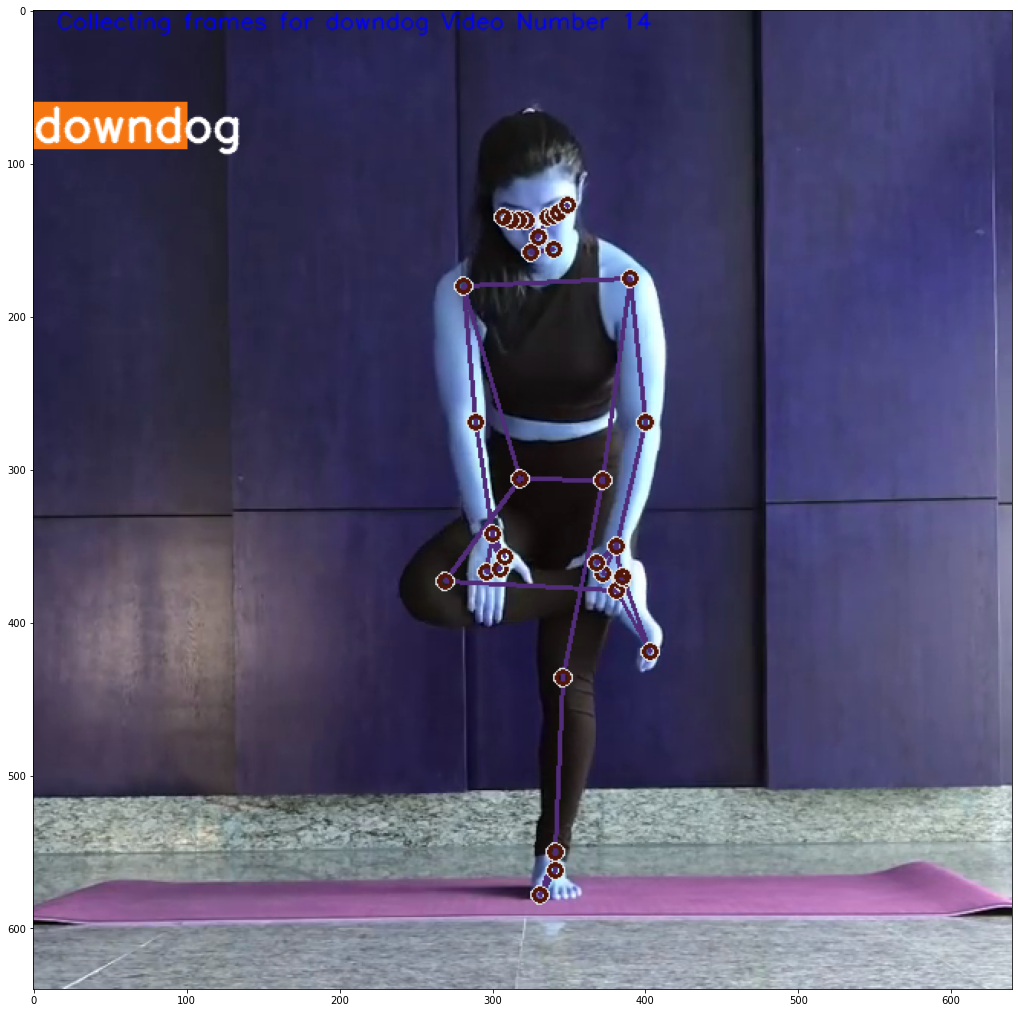

In [60]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [63]:
sequence


9

In [66]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [67]:
cap.release()
cv2.destroyAllWindows()


In [68]:
res[np.argmax(res)] > threshold


True

In [69]:
(num_sequences,30,1662)


NameError: name 'num_sequences' is not defined